# Introduction to neural network classification with TensorFlow

* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
import tensorflow as tf
X.shape, len(X)

((1000, 2), 1000)

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
y.shape, len(y)

((1000,), 1000)

Let's visualize this complex data.

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


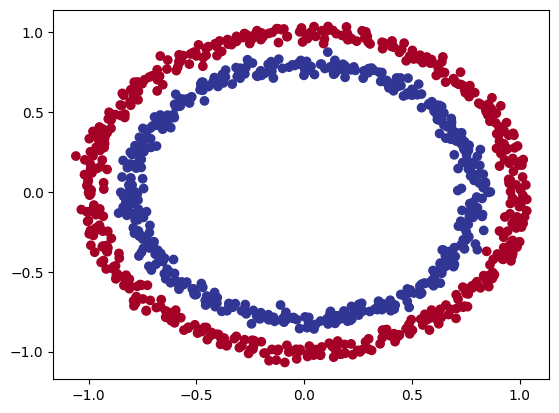

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)


## Steps in modelling

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["Accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.6224 - Accuracy: 0.4770
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.9243 - Accuracy: 0.5180
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 5.4107 - Accuracy: 0.5250
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.9491 - Accuracy: 0.5280
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 4.9681 - Accuracy: 0.5360


In [ ]:
# Let's try improving increasing the number of epoc
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 1s 7ms/step - loss: 0.6935 - Accuracy: 0.5000


[0.6934831142425537, 0.5]

The model is getting around 50% accuracy... it's performing as if it's guessing.

So let's an extra layer.

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

The extra layer has no effect on the model.

In [ ]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving the model

Steps that might be needed:

1. Adding layers
2. Increase the number of hidden units (or more layers)
3. Change the activation functions
4. Change the optimization function
5. Change the learning rate
6. Fitting on more data
7. Fitting for longer

More layers and chaged the optimizer:

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.5000


[0.6987617015838623, 0.5]

To visualize our model's predictions, let's create a function `plot_decision_boundary()``

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plot the decision boundary created by a model predicting on X
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boudnary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


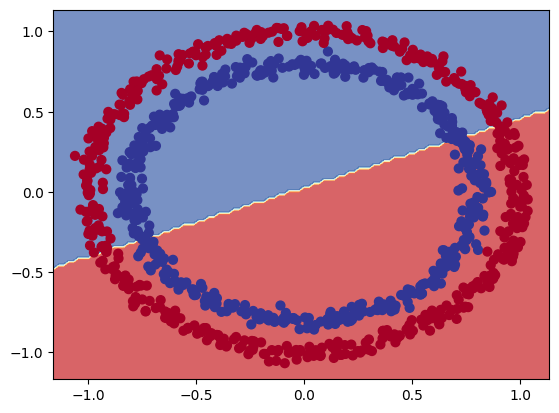

In [ ]:
# Check out the predictions
plot_decision_boundary(model=model_3, X=X, y=y)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.5000


[0.6987617015838623, 0.5]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the differents X values
* Make preductions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
# Let's see if the model can be used for a regression problem...

tf.random.set_seed(42)
# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 347.6698 - mae: 347.6698
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 254.0904 - mae: 254.0904
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 161.4690 - mae: 161.4690
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 65.1782 - mae: 65.1782
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 63.8826 - mae: 63.8826
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 80.7034 - mae: 80.7034
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 59.3025 - mae: 59.3025
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 43.1310 - mae: 43.1310
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 47.4810 - mae: 47.4810
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 41.4883 - mae: 41.4883
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 4ms/step


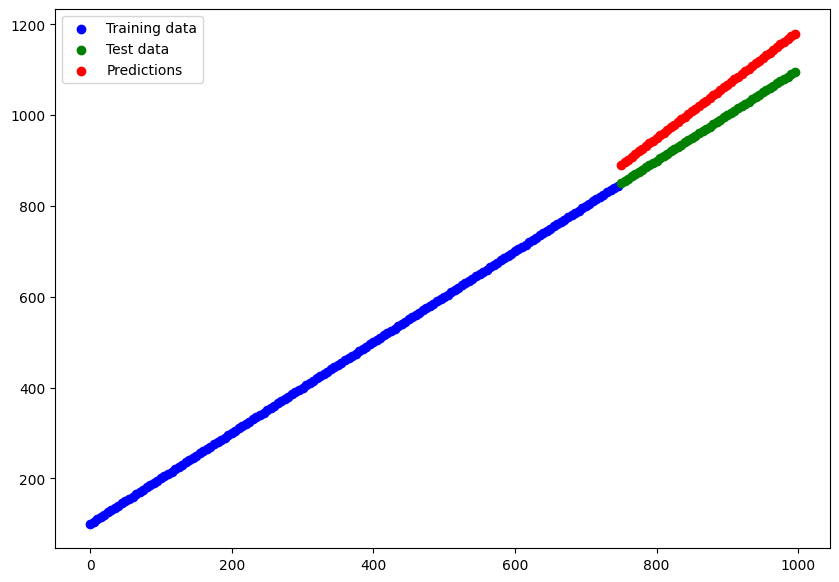

In [ ]:
# Make prediction with trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's prediction against the regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

The model works for data with **linearity**.

## Non-linearity

Examples of how not to do it:

***Linear activation***

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["Accuracy"])

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.9948 - Accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9787 - Accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9569 - Accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9419 - Accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9384 - Accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9286 - Accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9116 - Accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9099 - Accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9084 - Accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9073 - Accuracy: 0.4840
Epoch 11/

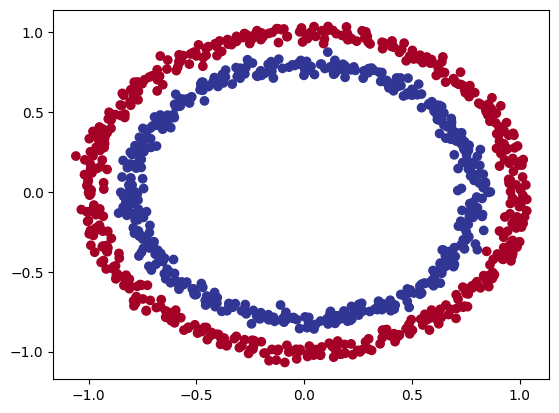

In [ ]:
# Check out the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
y_pred_4 = model_4.predict(X)

np.unique(np.round(np.max(y_pred_4, axis=1)))

32/32 [==============================] - 0s 2ms/step


array([-1.,  0.,  1.], dtype=float32)

The model output has negative values so could look like multi-classification output but isn't. It is necessary some modifications.

313/313 [==============================] - 1s 2ms/step
doing binary classification


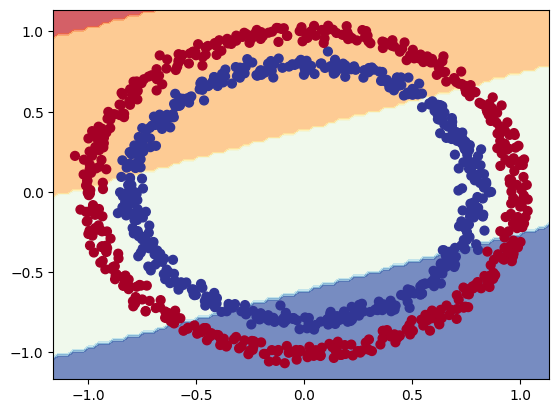

In [ ]:
# Check the decision boundary for the latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try to build a neural network with non-linear activation function:

***ReLu***

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['Accuracy'])

history = model_5.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3549 - Accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2797 - Accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2134 - Accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1423 - Accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0876 - Accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0019 - Accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9278 - Accuracy: 0.4960
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7893 - Accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7076 - Accuracy: 0.4680
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6048 - Accuracy: 0.4590
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


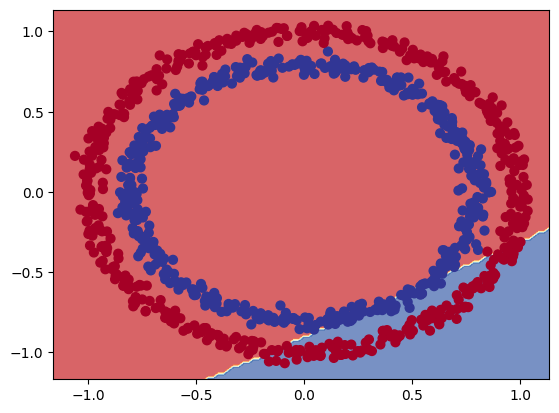

In [ ]:
plot_decision_boundary(model=model_5, X=X, y=y)

In [ ]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.8563 - Accuracy: 0.4290


[0.8562530279159546, 0.42899999022483826]

In [ ]:
y_pred_5 = model_5.predict(X)
np.unique(np.round(np.max(y_pred_5, axis=1)))

32/32 [==============================] - 0s 1ms/step


array([0., 1.], dtype=float32)

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['Accuracy']
)

history = model_6.fit(X, y, epochs=250, verbose = 0)

In [ ]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0455 - Accuracy: 0.9890


[0.04547644034028053, 0.9890000224113464]

In [ ]:
y_pred_6 = model_6.predict(X)

32/32 [==============================] - 0s 2ms/step


In [ ]:
np.unique(np.round(np.max(y_pred_6, axis=1)))

array([-2., -1., -0.,  1.,  2.,  3.], dtype=float32)

313/313 [==============================] - 1s 2ms/step
doing binary classification


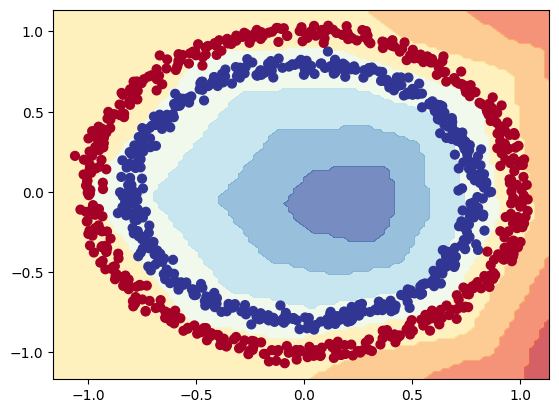

In [ ]:
plot_decision_boundary(model=model_6, X=X, y=y)

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["Accuracy"])

history = model_7.fit(X, y, epochs=250, verbose=0)

In [ ]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0032 - Accuracy: 1.0000


[0.003248085966333747, 1.0]

In [ ]:
y_pred_7 = model_7.predict(X)
np.unique(np.round(np.max(y_pred_7, axis=1)))

32/32 [==============================] - 0s 1ms/step


array([0., 1.], dtype=float32)

313/313 [==============================] - 0s 1ms/step
doing binary classification


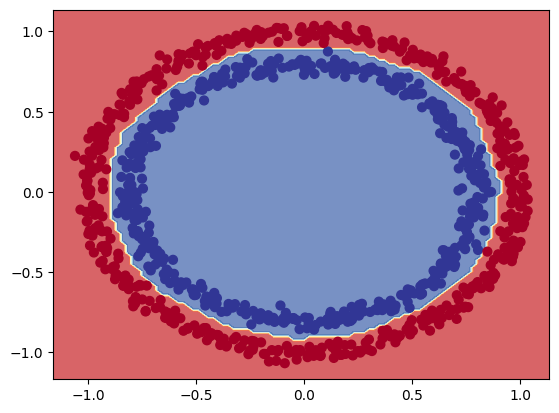

In [ ]:
plot_decision_boundary(model=model_7, X=X, y=y)

Text(0.5, 0, 'epochs')

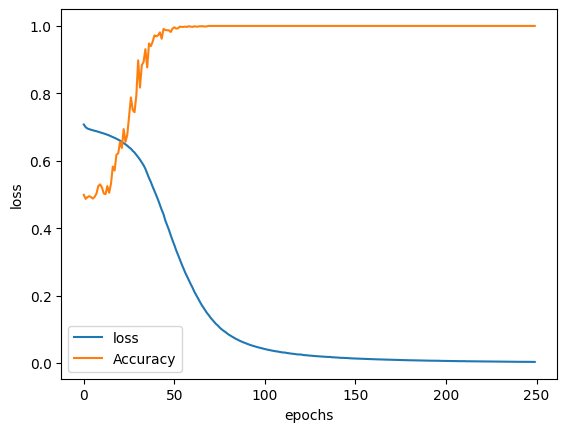

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

The combinations of **linear** and **non-linear** are the key to draw any pattern.

## Replications of activations functions

### Sigmoid

In [ ]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

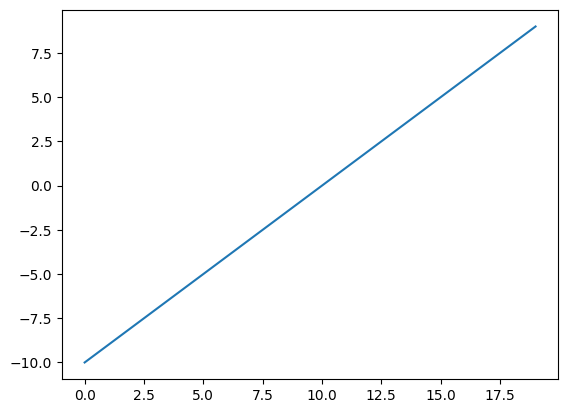

In [ ]:
plt.plot(A)

In [ ]:
# Replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function to linear example tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

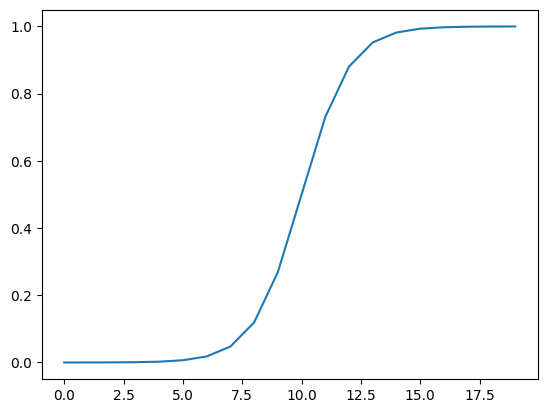

In [ ]:
plt.plot(sigmoid(A))

`ReLu`

In [ ]:
# Recreate ReLu tensor
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

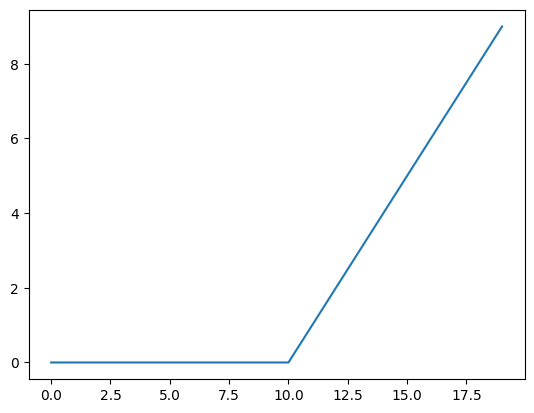

In [ ]:
plt.plot(relu(A))

`Linear`

In [ ]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

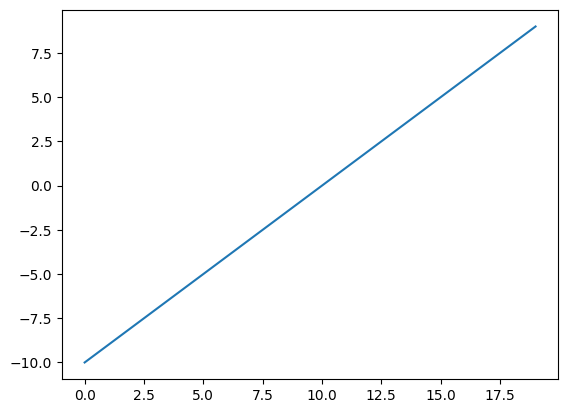

In [ ]:
plt.plot(tf.keras.activations.linear(A))

In [ ]:
np.unique(A == tf.keras.activations.linear(A))

array([ True])

## Evaluating and improving classification

Training set > Validation test > test set

In [ ]:
len(X), X

(1000,
 array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]))

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
model_7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                30        
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Create a model to fit on the training data and evaluate on test

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history_8 = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6978 - accuracy: 0.4725
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5612
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.6263
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6209 - accuracy: 0.7625
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.7700
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.9262
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3376 - accuracy: 0.9450
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2417 - accuracy: 0.9712
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.9925
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.9975
Epoch 11/25
25/25 [

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 1.0000


[0.016441710293293, 1.0]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


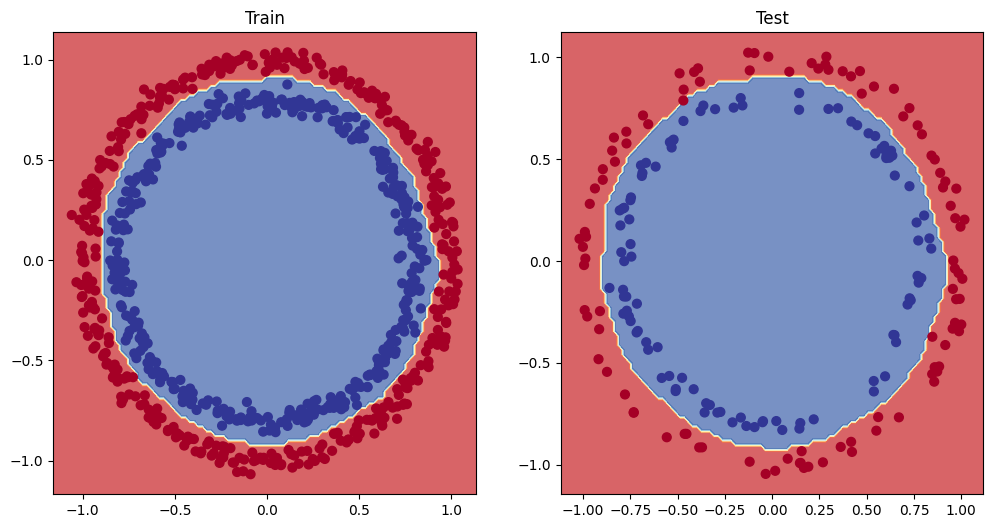

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model=model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model=model_8, X=X_test, y=y_test)
plt.show();

Text(0.5, 0, 'epochs')

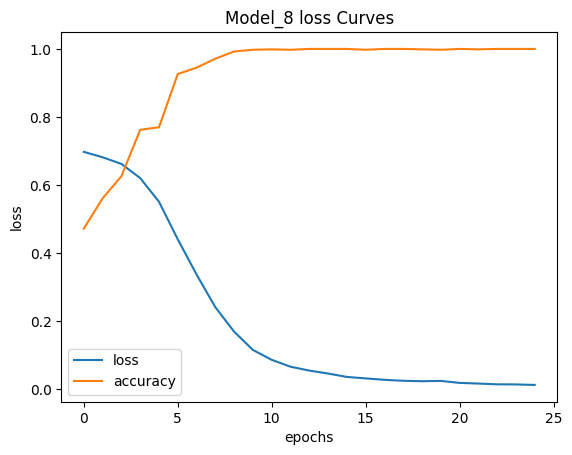

In [ ]:
pd.DataFrame(history_8.history).plot()
plt.title('Model_8 loss Curves')
plt.ylabel('loss')
plt.xlabel('epochs')

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the moest training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model
* A modified loss curves plot

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.4950 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.4950 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.4925 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.4925 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4975 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5163 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5163 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

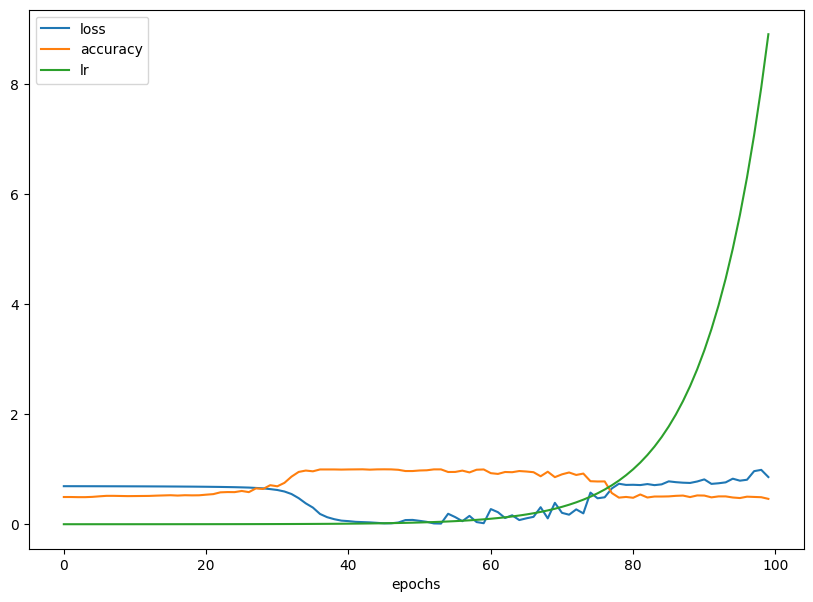

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel='epochs')

Text(0.5, 1.0, 'Learning rate vs. loss')

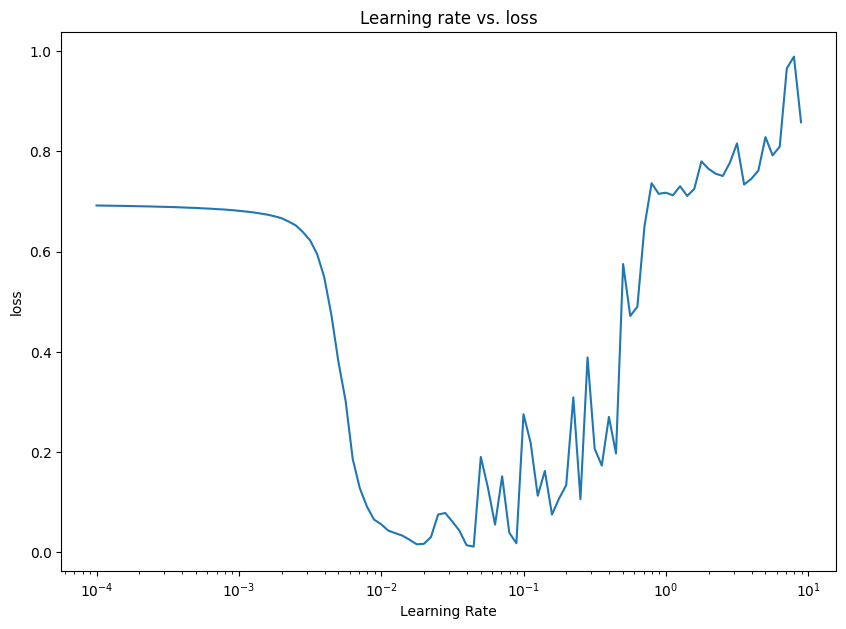

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("loss")
plt.title("Learning rate vs. loss")

In [ ]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Before was used 0.001, we're going to use 0.02 (so 20 epochs)
0.02/0.001

20.0

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])


history_10 = model_10.fit(X_train, y_train, epochs=20)


Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.5150
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.6363
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6235 - accuracy: 0.6950
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.9062
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.9712
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1790 - accuracy: 0.9812
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9862
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9987
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9962
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9975
Epoch 11/20
25/25 [

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9950


[0.02017640322446823, 0.9950000047683716]

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 1.0000


[0.016441710293293, 1.0]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


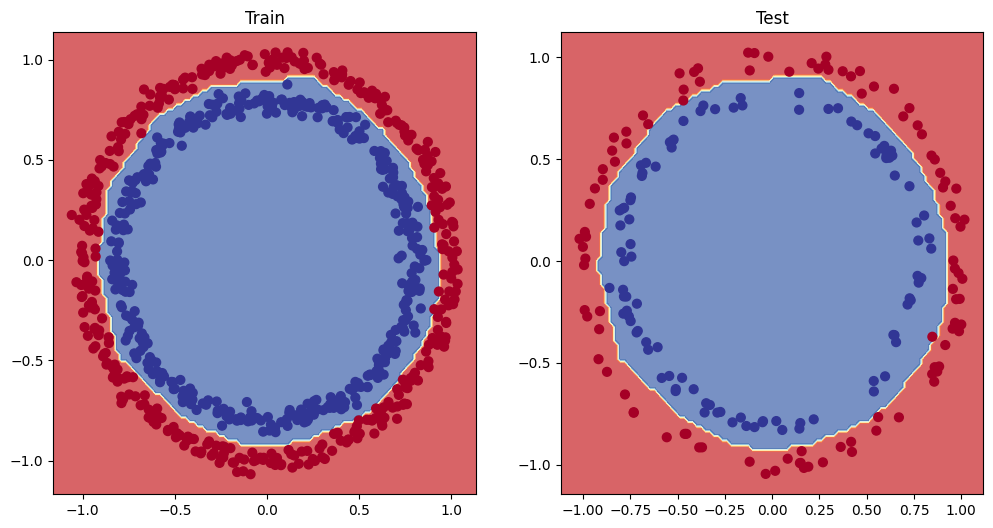

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model=model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model=model_10, X=X_test, y=y_test)
plt.show();

## More classification evaluation methods

* Accuracy
* Precission
* Recall
* F1-core
* Confusion matrix
* Classification report

In [ ]:
# Check the accuracy of the model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9950
Model loss on the test set: 0.02017640322446823
Model accuracy on the test set: 99.50%


In [ ]:
# Check confussion Matrix
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)

confusion_matrix(y_test, np.round(np.max(y_preds, axis=1)))

7/7 [==============================] - 0s 2ms/step


array([[100,   1],
       [  0,  99]])

In [ ]:
# It works with tf.round as well
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  0,  99]])

In [ ]:
# A mix of scikit-learn's plot_confusion_matrix
def plot_confusion_matrix(y, y_preds):
  import itertools
  figsize = (10, 10)

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)


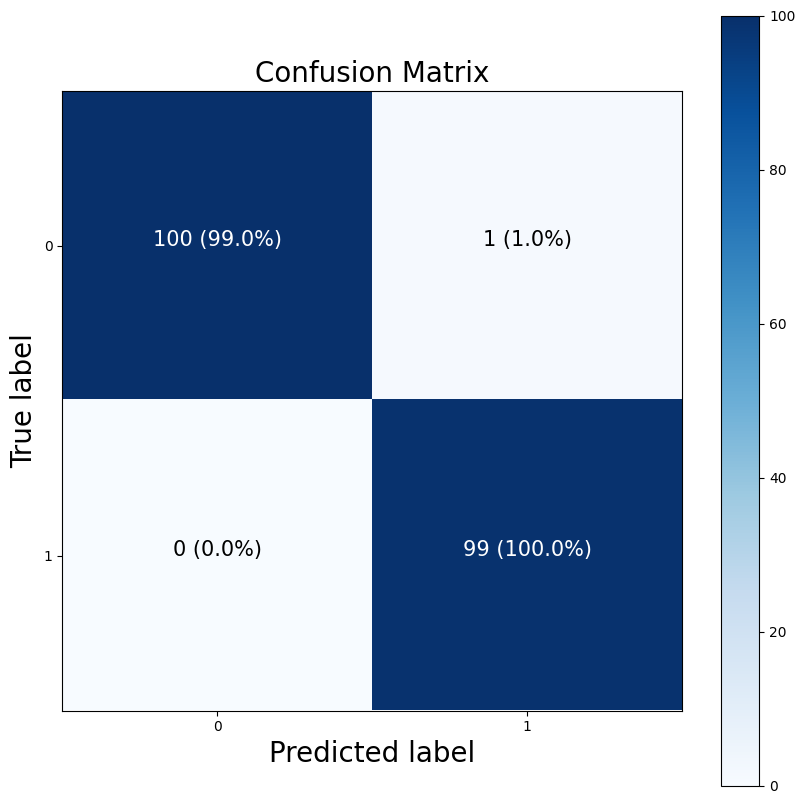

In [ ]:
plot_confusion_matrix(y_test, y_preds)

# Multiclass Classification

More than two classes as an option.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# This data has already been sorted into training and test
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show training
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check shape
train_data[0].shape, train_labels[0].shape

((28, 28), ())

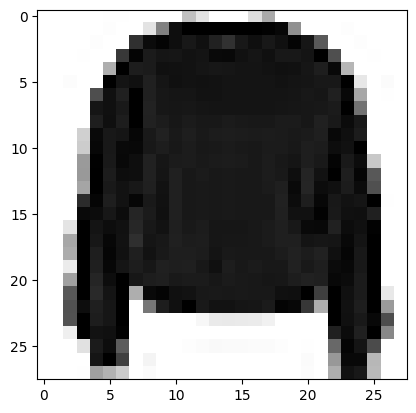

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7], cmap=plt.cm.binary)

In [ ]:
train_labels[7]

2

In [ ]:
# Create a small list to index labels
class_names =['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'Sneaker')

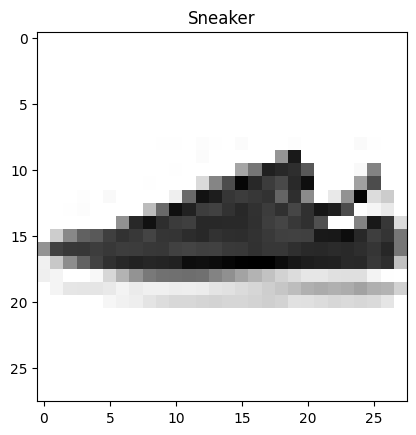

In [ ]:
# Plot an example image and its label
index_of_choice = 6
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

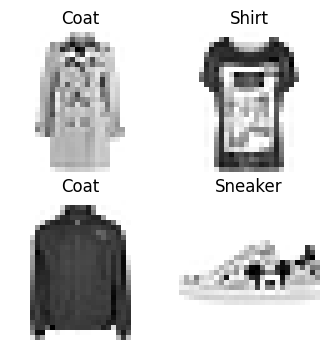

In [ ]:
# Plot multiple random images
import random
plt.figure(figsize=(4,4))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi_classification model

Tweaks to change:

* Input shape = 28 x 28
* Output shape = 10
* Loss function = `tf.keras.losses.CategoricalCrossEntropy()`
  * If labels are one-hot encoded, use `CategoricalCrossentropy()`
  * If labels are integenr, use `SparseCategoricalCrossentropy()`
* Output layer activation = Softmax

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # tf.keras.activations.softmax # Has 10 labels
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.0229 - accuracy: 0.2364 - val_loss: 1.7118 - val_accuracy: 0.3065
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6226 - accuracy: 0.3291 - val_loss: 1.5408 - val_accuracy: 0.3547
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4614 - accuracy: 0.3934 - val_loss: 1.3662 - val_accuracy: 0.4211
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3172 - accuracy: 0.4442 - val_loss: 1.2716 - val_accuracy: 0.4964
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1758 - accuracy: 0.5085 - val_loss: 1.1082 - val_accuracy: 0.5295
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0960 - accuracy: 0.5286 - val_loss: 1.1298 - val_accuracy: 0.4954
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0701 - accuracy: 0.5414 - val_loss: 1.1241 - val_accuracy:

or:

In [ ]:
train_labels, tf.one_hot(train_labels, depth=10).shape

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8), TensorShape([60000, 10]))

In [ ]:
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 10)                7850      
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
Total params: 8070 (31.52 KB)
Trainable params: 8070 (31.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # tf.keras.activations.softmax # Has 10 labels
])

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2388 - accuracy: 0.1583 - val_loss: 1.9671 - val_accuracy: 0.1845
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7861 - accuracy: 0.2360 - val_loss: 1.6849 - val_accuracy: 0.3171
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5781 - accuracy: 0.3535 - val_loss: 1.4718 - val_accuracy: 0.4044
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3773 - accuracy: 0.4265 - val_loss: 1.3070 - val_accuracy: 0.4489
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2849 - accuracy: 0.4503 - val_loss: 1.3482 - val_accuracy: 0.4075
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2602 - accuracy: 0.4547 - val_loss: 1.2578 - val_accuracy: 0.4598
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2523 - accuracy: 0.4567 - val_loss: 1.2482 - val_accuracy:

Text(0.5, 0, 'epochs')

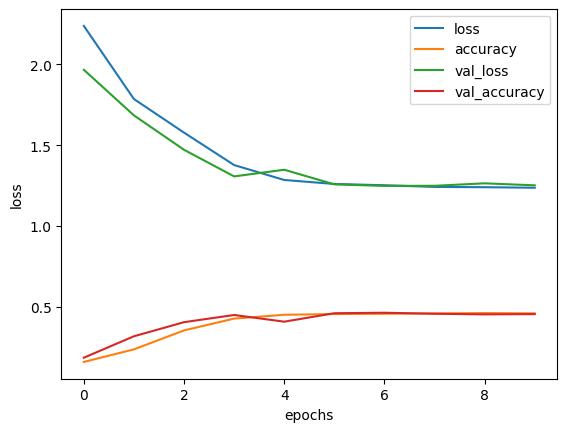

In [ ]:
pd.DataFrame(non_norm_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
train_data.min(), train_data.max()

(0, 255)

Neural networds prefer data to be scaled (or normalized).

In [ ]:
# Get training and testing data between 0 - 1
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

norm_history = model_12.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0107 - accuracy: 0.3275 - val_loss: 1.3749 - val_accuracy: 0.4404
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3253 - accuracy: 0.4443 - val_loss: 1.2735 - val_accuracy: 0.4494
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1968 - accuracy: 0.4995 - val_loss: 1.1555 - val_accuracy: 0.5128
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1087 - accuracy: 0.5337 - val_loss: 1.1377 - val_accuracy: 0.5447
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0782 - accuracy: 0.5447 - val_loss: 1.0801 - val_accuracy: 0.5383
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0239 - accuracy: 0.5592 - val_loss: 1.0839 - val_accuracy: 0.5374
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0044 - accuracy: 0.5797 - val_loss: 0.9720 - val_accuracy:

In [ ]:
model_11.evaluate(test_data, tf.one_hot(test_labels, depth=10))

313/313 [==============================] - 1s 2ms/step - loss: 1.2517 - accuracy: 0.4544


[1.2517489194869995, 0.4544000029563904]

In [ ]:
model_12.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.8102 - accuracy: 0.6767


[0.810199499130249, 0.6766999959945679]

Text(0, 0.5, 'epochs')

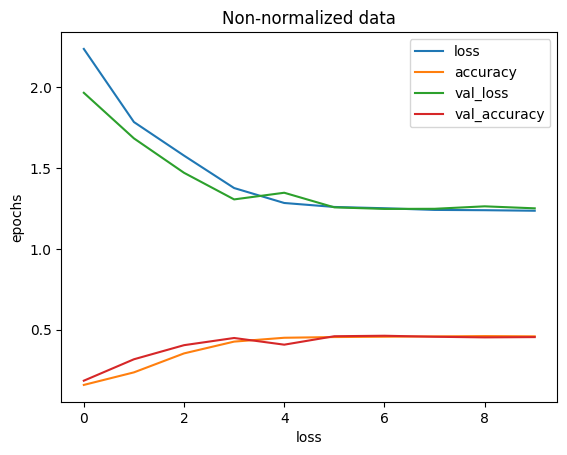

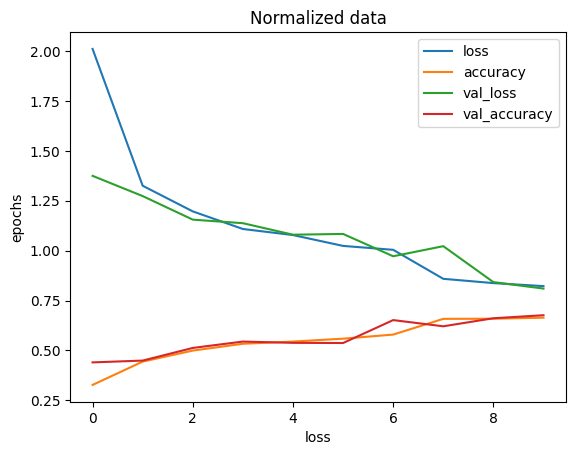

In [ ]:
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')
plt.xlabel('loss')
plt.ylabel('epochs')
pd.DataFrame(norm_history.history).plot(title='Normalized data')
plt.xlabel('loss')
plt.ylabel('epochs')

> Neural nethowrks tend to prefer data in numerical form as well as scaled/normalized

## Finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7227 - accuracy: 0.7445 - val_loss: 0.5191 - val_accuracy: 0.8205 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4642 - accuracy: 0.8373 - val_loss: 0.5179 - val_accuracy: 0.8202 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4299 - accuracy: 0.8496 - val_loss: 0.4713 - val_accuracy: 0.8277 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4116 - accuracy: 0.8552 - val_loss: 0.4565 - val_accuracy: 0.8384 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4036 - accuracy: 0.8569 - val_loss: 0.4792 - val_accuracy: 0.8309 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3966 - accuracy: 0.8591 - val_loss: 0.4622 - val_accuracy: 0.8290 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5

Text(0.5, 1.0, 'Findint the best Learning Rate')

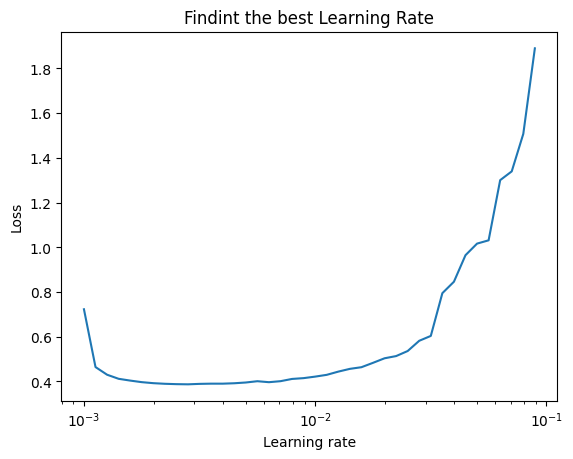

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Findint the best Learning")

In [ ]:
10**-3

0.001

In [ ]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

model_14.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7033 - accuracy: 0.7592 - val_loss: 0.5415 - val_accuracy: 0.8164
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4845 - accuracy: 0.8339 - val_loss: 0.5731 - val_accuracy: 0.8133
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4550 - accuracy: 0.8419 - val_loss: 0.4863 - val_accuracy: 0.8309
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4360 - accuracy: 0.8481 - val_loss: 0.4719 - val_accuracy: 0.8366
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4251 - accuracy: 0.8518 - val_loss: 0.4839 - val_accuracy: 0.8286
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4154 - accuracy: 0.8541 - val_loss: 0.4844 - val_accuracy: 0.8256
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4096 - accuracy: 0.8561 - val_loss: 0.4673 - val_accuracy:

## Evaluating multi-class classification models

To evaluate multi-class classification model we could:
* Evaluate its perfomance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make predictions of the model_14
y_probs = model_14.predict(test_data_norm)

y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.63518673e-08, 1.21138568e-11, 4.54184779e-08, 3.25762198e-06,
        2.66660969e-08, 1.47345178e-02, 2.36681763e-06, 7.58732185e-02,
        1.04790635e-03, 9.08338547e-01],
       [3.20655497e-04, 4.18073398e-07, 9.27298605e-01, 8.61969420e-06,
        2.86331996e-02, 5.23799444e-23, 4.37105745e-02, 5.54479586e-19,
        2.78975422e-05, 1.12643349e-19],
       [4.75453016e-05, 9.99833345e-01, 1.20454217e-07, 1.12183050e-04,
        6.31539888e-06, 6.43583733e-16, 6.11103587e-07, 3.39722287e-31,
        9.30419564e-09, 5.81921637e-25],
       [8.76737977e-05, 9.99768257e-01, 1.02115301e-07, 1.35880706e-04,
        1.51019947e-06, 6.66940732e-14, 6.53238249e-06, 2.04033558e-27,
        4.94044849e-09, 1.81726104e-20],
       [2.26543501e-01, 3.20676372e-06, 2.30724573e-01, 2.71969126e-03,
        1.31856585e-02, 1.05189539e-13, 5.26532054e-01, 1.49804419e-10,
        2.91245931e-04, 8.22160211e-13]], dtype=float32)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([3.6351867e-08, 1.2113857e-11, 4.5418478e-08, 3.2576220e-06,
        2.6666097e-08, 1.4734518e-02, 2.3668176e-06, 7.5873218e-02,
        1.0479063e-03, 9.0833855e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

y_preds, y_probs.shape, y_preds.shape

(array([9, 2, 1, ..., 8, 1, 5]), (10000, 10), (10000,))

In [ ]:
y_preds[10:]

array([4, 5, 5, ..., 8, 1, 5])

In [ ]:
test_labels[10:]

array([4, 5, 7, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[819,   8,  21,  35,   6,   1,  98,   1,  11,   0],
       [  2, 954,   6,  32,   5,   0,   0,   0,   1,   0],
       [ 12,   4, 770,   8, 140,   0,  53,   0,  13,   0],
       [ 37,  14,  20, 822,  64,   1,  36,   0,   6,   0],
       [  0,   2, 123,  15, 806,   0,  47,   0,   7,   0],
       [  0,   0,   0,   1,   0, 915,   0,  45,  10,  29],
       [134,   3, 141,  29, 113,   0, 559,   0,  19,   2],
       [  0,   0,   0,   0,   0,  26,   0, 946,   0,  28],
       [  4,   0,   8,   6,   6,   4,  14,   4, 953,   1],
       [  0,   1,   0,   0,   0,   6,   0,  42,   0, 951]])

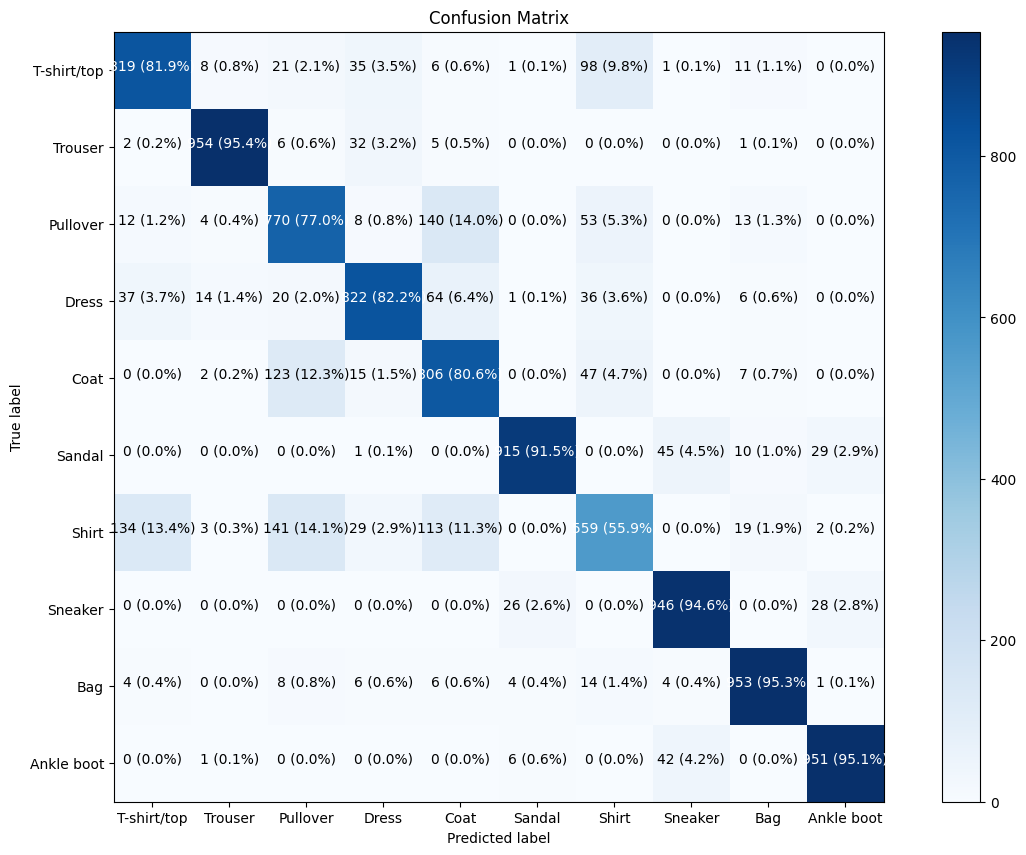

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 10),
                      text_size=10)

> Let's visualize the inputs and outputs of the model.

* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 22ms/step


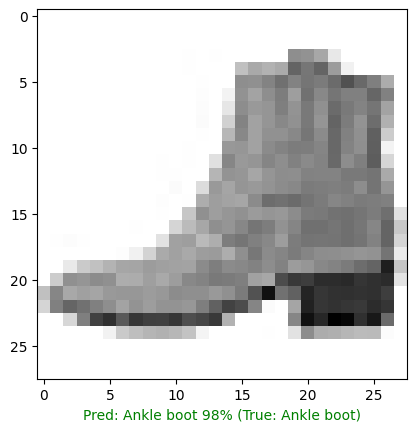

In [ ]:
# Check out a random image as whell as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns the model is learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
28*28

784

In [ ]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 10)                7850      
                                                                 
 dense_39 (Dense)            (None, 10)                110       
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
Total params: 8070 (31.52 KB)
Trainable params: 8070 (31.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.5415991 ,  0.6284955 , -0.6249643 , ...,  0.355659  ,
         -0.08174131, -0.7108032 ],
        [ 0.39098206,  0.22699523,  0.18889514, ...,  0.34371564,
          0.34155336, -0.65399283],
        [ 0.34280902,  0.59603816, -0.626361  , ..., -0.20422588,
          0.24595408, -0.45347387],
        ...,
        [-0.19108509, -0.08158433, -0.02128111, ..., -0.01443182,
         -0.237025  ,  0.14325187],
        [-0.91818726,  0.17942949,  0.09168341, ...,  0.73102045,
          0.7852145 ,  0.29306176],
        [-0.22189762, -0.12799203, -0.20957525, ...,  0.48841918,
         -0.0851227 , -0.27844393]], dtype=float32),
 (784, 10),
 2)

In [ ]:
# Check bias vector
biases, biases.shape

(array([ 0.5440956 ,  0.4160855 , -0.48367405, -0.01518071, -0.01300277,
         0.212137  ,  0.4650425 ,  0.03827764, -0.16634747, -0.09502052],
       dtype=float32),
 (10,))

Every neuron has a bias vector. Each of theses is paired with a weights matrix.

The bias vector get initialized as zeros 8at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

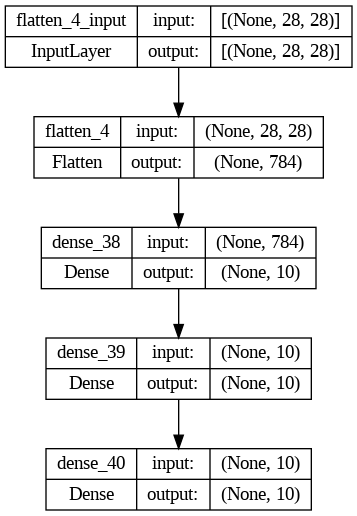

In [ ]:
# Let's check anothet way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)